In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests as req
from citipy import citipy
from datetime import datetime
from config import weather_api_key

In [2]:
def build_url(city):
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    return base_url + "units=Imperial" + "&APPID=" + weather_api_key + "&q=" + city

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?" + "units=Imperial" + "&APPID=" + weather_api_key

In [4]:
cities = ["Pittsburgh", "Austin", "New  York", "Los Angeles", "Seattle"]
for city in cities:
    try:
        city_url = url + "&q=" + city
        weather = req.get(city_url).json()
        temp = weather['main']['temp']
    except KeyError:
        print("KeyError received for " + city)
        continue
    print("It is currently " + str(temp) + " degrees in " + city)

        

It is currently 67.35 degrees in Pittsburgh
It is currently 70.68 degrees in Austin
KeyError received for New  York
It is currently 54.41 degrees in Los Angeles
It is currently 42.78 degrees in Seattle


In [24]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    #print(city_url)

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = req.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        #print("city="+city
        #      +", lat="+str(city_weather['coord']['lat'])
        #      +", lon="+str(city_weather['coord']['lon']))  

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=921615a58e35716cd72358f51d7d017f&q=Pittsburgh
Processing Record 1 of Set 1 | Pittsburgh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=921615a58e35716cd72358f51d7d017f&q=Austin
Processing Record 2 of Set 1 | Austin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=921615a58e35716cd72358f51d7d017f&q=New++York
Processing Record 3 of Set 1 | New  York
City not found. Skipping...
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=921615a58e35716cd72358f51d7d017f&q=Los+Angeles
Processing Record 4 of Set 1 | Los Angeles
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=921615a58e35716cd72358f51d7d017f&q=Seattle
Processing Record 5 of Set 1 | Seattle
-----------------------------
Data Retrieval Complete      
-----------------------------


In [25]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pittsburgh,40.4406,-79.9959,77.00,43,1,8.05,US,2021-04-07 16:31:43
1,Austin,30.2672,-97.7431,75.99,78,90,8.05,US,2021-04-07 16:27:11
2,Los Angeles,34.0522,-118.2437,66.99,63,1,4.74,US,2021-04-07 16:32:01
3,Seattle,47.6062,-122.3321,45.00,76,90,10.36,US,2021-04-07 16:29:57


In [26]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pittsburgh,US,2021-04-07 16:31:43,40.4406,-79.9959,77.00,43,1,8.05
1,Austin,US,2021-04-07 16:27:11,30.2672,-97.7431,75.99,78,90,8.05
2,Los Angeles,US,2021-04-07 16:32:01,34.0522,-118.2437,66.99,63,1,4.74
3,Seattle,US,2021-04-07 16:29:57,47.6062,-122.3321,45.00,76,90,10.36


In [27]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [ ]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [ ]:
coordinates = list(lat_lngs)

In [ ]:
city = citipy.nearest_city(22.99, 120.21)
print(city)
print(city.city_name)     # Tainan, my home town
print(city.country_code)


In [28]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

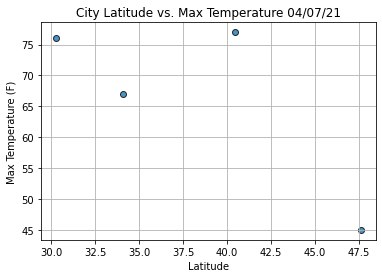

In [32]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

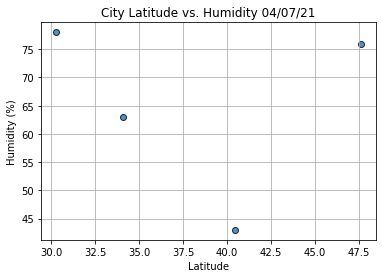

In [33]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

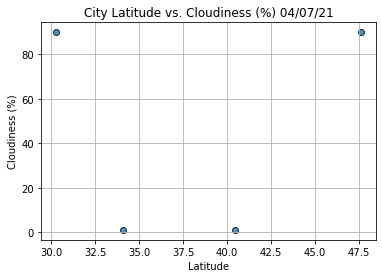

In [34]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

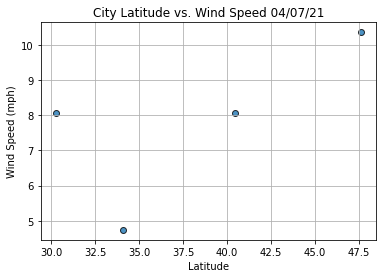

In [35]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()